In [4]:

import os
import sys
import importlib
import copy
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

from tools_pattern import get_eucledean_dist

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'distribution_123share_vs_random_210407'

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )

import compress_pickle
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
#                                    'mf_grc_model/input_graph_201114_restricted_z.gz')
input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
#                                    'mf_grc_model/input_graph_210407_xlim_90_140_zlim_17_27.gz')
                                   'mf_grc_model/input_graph_210407_xlim_90_140_zlim_2.5_41.5.gz')
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz')
# grcs = [k for k in input_graph.grcs.keys()]

z_min = 10
z_max = 40
# z_min = 20000
# z_max = 30000
x_min = 360
x_max = 520
# radius = 200

n_randoms = 5

def get_prob(in_graph, unique_count=False):
    n_common_pairs = 0
    processed = set()
    total_n_pairs = 0
    hist = defaultdict(int)
    n = 0
    for grc_i_id in in_graph.grcs:
        n += 1
        if n % 1000 == 0:
            print(n, end=', ')
        grc_i = in_graph.grcs[grc_i_id]
        rosettes_i = set([mf[0] for mf in grc_i.edges])
        for grc_j_id in in_graph.grcs:
            if grc_i_id == grc_j_id:
                continue
            if unique_count and (grc_i_id, grc_j_id) in processed:
                continue
            processed.add((grc_i_id, grc_j_id))
            processed.add((grc_j_id, grc_i_id))
            grc_j = in_graph.grcs[grc_j_id]
            common_rosettes = set([mf[0] for mf in grc_j.edges])
            common_rosettes = common_rosettes & rosettes_i
            hist[len(common_rosettes)] += 1
    for k in hist:
        # fix 0 datapoint plots
        if hist[k] == 0:
            hist[k] = 1
    return hist

input_observed = copy.deepcopy(input_graph)
hist_data = get_prob(input_observed)

n_grcs = len(input_graph.grcs)

1000, 

In [14]:

def check_share(fname, depth):
    graph = compress_pickle.load(fname)
    graph.remove_empty_mfs()
    hist_data = get_prob(graph)
    n_grcs = len(graph.grcs)
    n_mfs = len(graph.mfs)
#     print(hist_data)
    print(fname)
    print(f'n_grcs: {n_grcs} ({n_grcs/depth}), n_mfs: {n_mfs}({n_mfs/depth})')
    print(f'1: {hist_data[1]/n_grcs}, 2: {hist_data[2]/n_grcs}')
    print()

fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'mf_grc_model/input_graph_210407_xlim_90_140_zlim_17_27.gz')
check_share(fname, depth=10)

fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'mf_grc_model/input_graph_210407_xlim_90_140_zlim_14.5_29.5.gz')
check_share(fname, depth=15)

fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'mf_grc_model/input_graph_210407_xlim_90_140_zlim_12.0_32.0.gz')
check_share(fname, depth=20)

fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'mf_grc_model/input_graph_210407_xlim_90_140_zlim_9.5_34.5.gz')
check_share(fname, depth=25)

fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'mf_grc_model/input_graph_210407_xlim_90_140_zlim_7.0_37.0.gz')
check_share(fname, depth=30)

fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'mf_grc_model/input_graph_210407_xlim_90_140_zlim_4.5_39.5.gz')
check_share(fname, depth=35)

fname = ('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
                                   'mf_grc_model/input_graph_210407_xlim_90_140_zlim_2.5_41.5.gz')
check_share(fname, depth=39)

/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_210407_xlim_90_140_zlim_17_27.gz
n_grcs: 340 (34.0, n_mfs: 352(35.2)
1: 19.83529411764706, 2: 1.1941176470588235

/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_210407_xlim_90_140_zlim_14.5_29.5.gz
n_grcs: 502 (33.46666666666667, n_mfs: 375(25.0)
1: 28.768924302788843, 2: 1.6852589641434264

/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_210407_xlim_90_140_zlim_12.0_32.0.gz
n_grcs: 676 (33.8, n_mfs: 398(19.9)
1: 37.13905325443787, 2: 2.28698224852071

/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_210407_xlim_90_140_zlim_9.5_34.5.gz
n_grcs: 852 (34.08, n_mfs: 415(16.6)
1: 44.201877934272304, 2: 2.5093896713615025

1000, /n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_210407_xlim_9

In [24]:

# import tools_mf_graph
# importlib.reload(tools_mf_graph)

# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'\
# #                                    'mf_grc_model/input_graph_210407_xlim_90_140_zlim_17_27.gz')
#                                    'mf_grc_model/input_graph_210407_xlim_90_140_zlim_2.5_41.5.gz')

n_randoms = 5
hist_random_21 = []

for n in range(n_randoms):
    # input_graph.randomize_graph(random_model=True)
    input_graph.randomize_graph_by_grc(
        single_connection_per_pair=True,
        constant_grc_degree=True,
        constant_dendrite_length=21000,
#         always_pick_closest_rosette=True,
        )
    hist_random = get_prob(input_graph)
    hist_random_21.append(hist_random)


Average num_claw_per_grc: 3.5525525525525525
1000, Average num_claw_per_grc: 3.5525525525525525
1000, Average num_claw_per_grc: 3.5525525525525525
1000, Average num_claw_per_grc: 3.5525525525525525
1000, Average num_claw_per_grc: 3.5525525525525525
1000, 

In [25]:

n_randoms = 5
hist_random_17 = []

for n in range(n_randoms):
    # input_graph.randomize_graph(random_model=True)
    input_graph.randomize_graph_by_grc(
        single_connection_per_pair=True,
        constant_grc_degree=True,
        constant_dendrite_length=17000,
#         always_pick_closest_rosette=True,
        )
    hist_random = get_prob(input_graph)
    hist_random_17.append(hist_random)


Average num_claw_per_grc: 3.5525525525525525
1000, Average num_claw_per_grc: 3.5525525525525525
1000, Average num_claw_per_grc: 3.5525525525525525
1000, Average num_claw_per_grc: 3.5525525525525525
1000, Average num_claw_per_grc: 3.5525525525525525
1000, 

In [ ]:


global_random_n_grcs, hist_global_random = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_analysis/share_distribution/gen_global_random_7k_204k_data_2000.gz')

import compress_pickle
compress_pickle.dump((
    hist_data,
    hist_random,
    global_random_n_grcs,
    hist_global_random,
    ), f"{script_n}_data.gz")
# normalize

# total_n_pairs = hist_data[0] + hist_data[1] + hist_data[2] + hist_data[3]
# global_random_n_grcs = 204000


In [ ]:

mpd_data = MyPlotData()
for n_share in [1, 2, 3]:
    if n_share in hist_data:
        mpd_data.add_data_point(
            n_share=n_share,
            count=hist_data[n_share]/n_grcs,
            type='Observation',
            )
#     for hist_random in hist_randoms:
#         if n_share in hist_random:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_random[n_share]/n_grcs,
#                 type='Local Random',
#                 )
#     for hist_random in hist_random2s:
#         if n_share in hist_random:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_random[n_share]/n_grcs,
#                 type='Local Random',
#                 )
#     for hist_ex_30 in hist_ex_30s:
#         if n_share in hist_ex_30:
#             mpd_data.add_data_point(
#                 n_share=n_share,
#                 count=hist_ex_30[n_share]/n_grcs,
#                 type='LocalEx Random',
#                 )
    if n_share in hist_global_random:
        mpd_data.add_data_point(
            n_share=n_share,
            # need to divide by 2 because we're sampling only 2/200 grcs
            # (or multiply others by 2)
            count=hist_global_random[n_share]/global_random_n_grcs/2,
            type='Global Random',
            )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, markerscale=2, prop={'size': 8})


# importlib.reload(my_plot); my_plot.my_relplot(
#     mpd_data,
#     x='n_share',
#     y='count',
#     hue='type',
#     # hue_order=['Data', 'Random Model'],
#     kind='scatter',
#     context='paper',
#     # ylim=[.005, 50],
#     ylim=[.005, 2000],
#     xlim=[.7, 3.3],
#     log_scale_y=True,
#     s=150,
#     # xticklabels=['', 1, '', 2, '', 3, ''],
#     xticks=[1, 2, 3],
#     height=4,
#     aspect=1.1,
#     custom_legend_fn=custom_legend_fn,
#     y_axis_label='GrC pairs / # GrCs',
#     x_axis_label='Shared Inputs',
#     # save_filename=f'{script_n}.pdf',
#     save_filename=f'{script_n}.svg',
#     show=True,
#     )


importlib.reload(my_plot); my_plot.my_relplot(
    mpd_data,
    x='n_share',
    y='count',
    hue='type',
    # hue_order=['Data', 'Random Model'],
    kind='line',
    err_style="bars",
    ci=68,
    markers=True,
    dashes=False,
#     s=150,
    context='paper',
    # ylim=[.005, 50],
    ylim=[.005, 2000],
    xlim=[.9, 3.1],
    log_scale_y=True,
#     s=150,
    # xticklabels=['', 1, '', 2, '', 3, ''],
    xticks=[1, 2, 3],
#     height=4,
    width=3,
    aspect=1.4,
    font_scale=1,
    custom_legend_fn=custom_legend_fn,
    y_axis_label='GrC pairs / # GrCs',
    x_axis_label='Shared MF inputs',
    # save_filename=f'{script_n}.pdf',
    save_filename=f'{script_n}_line.svg',
    show=True,
    )


Height: 3, Aspect: 1.1666666666666667


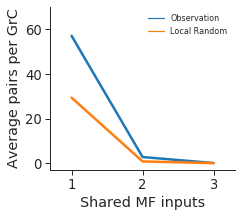

In [27]:

n_grcs = len(input_graph.grcs)

mpd_data = MyPlotData()
for n_share in [1, 2, 3]:
    if n_share in hist_data:
        mpd_data.add_data_point(
            n_share=n_share,
            count=hist_data[n_share]/n_grcs,
            type='Observation',
            )
    for hist_random in hist_random_17:
        if n_share in hist_random:
            mpd_data.add_data_point(
                n_share=n_share,
                count=hist_random[n_share]/n_grcs,
                type='Local Random',
                )

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, markerscale=2, prop={'size': 8})

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_data,
    x='n_share',
    y='count',
    hue='type',
    # hue_order=['Data', 'Random Model'],
    kind='line',
    err_style="bars",
#     ci=68,
    markers=True,
    dashes=False,
#     s=150,
    context='paper',
    # ylim=[.005, 50],
    ylim=[None, 70],
    xlim=[.7, 3.3],
    linewidth=2.5,
#     log_scale_y=True,
#     s=150,
    # xticklabels=['', 1, '', 2, '', 3, ''],
    xticks=[1, 2, 3],
    width=3.5,
    height=3,
#     aspect=1.1,
    custom_legend_fn=custom_legend_fn,
#     y_axis_label='GrC pairs / # GrCs',
    y_axis_label='Average pairs per GrC',
    x_axis_label='Shared MF inputs',
    # save_filename=f'{script_n}.pdf',
    save_filename=f'{script_n}_line_linear.svg',
    show=True,
    )


In [32]:
print(hist_data)
print(hist_random_17[0])
print(hist_data[2]/n_grcs)
print(hist_random_17[2][2]/n_grcs)
print(hist_random_21[2][2]/n_grcs)
print(hist_data[1]/n_grcs)
print(hist_random_17[2][1]/n_grcs)
print(hist_random_21[2][1]/n_grcs)

defaultdict(<class 'int'>, {0: 1693084, 1: 76014, 2: 3678, 3: 112, 4: 4})
defaultdict(<class 'int'>, {0: 1732884, 1: 38870, 2: 1086, 4: 4, 3: 48})
2.7612612612612613
0.7822822822822822
1.093093093093093
57.067567567567565
29.105105105105107
39.43543543543544
